In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-detail-dataset/Drug_details.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../input/drug-detail-dataset/Drug_details.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df.apply(lambda x: len(x.unique()))

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [10]:
df['Age'].min()

15

In [11]:
df['Age'].max()

74

In [12]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [13]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [14]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [15]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

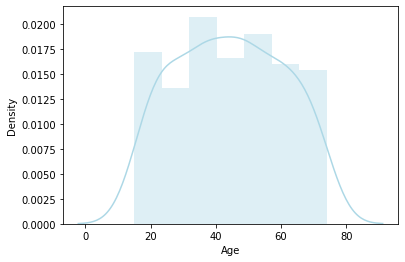

In [16]:
sns.distplot(df['Age'] ,color = 'lightblue')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

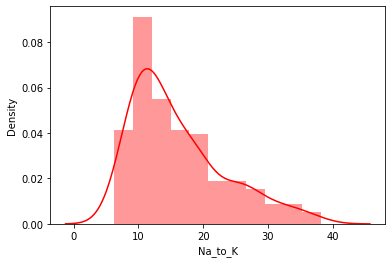

In [17]:
sns.distplot(df['Na_to_K'] ,color = 'red')

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

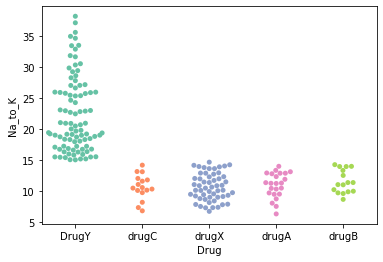

In [18]:
sns.swarmplot(x='Drug',y='Na_to_K', data=df ,palette = 'Set2')

<AxesSubplot:xlabel='Drug', ylabel='Age'>

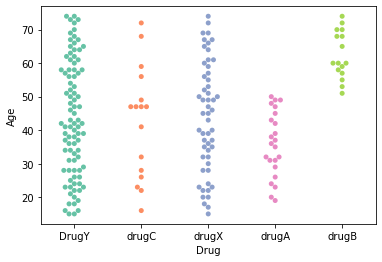

In [19]:
sns.swarmplot(x='Drug',y='Age', data=df ,palette = 'Set2')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


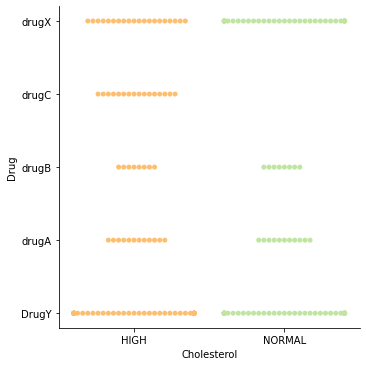

In [20]:
sns.catplot(x = 'Cholesterol' , y = 'Drug' , data = df , kind="swarm" , palette ='Spectral')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


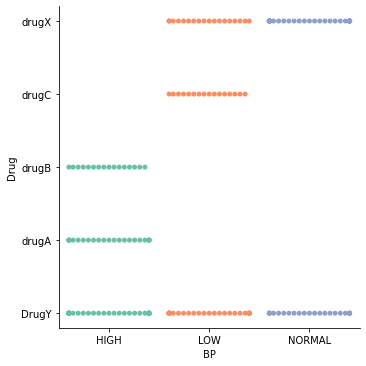

In [21]:
sns.catplot(x = 'BP' , y = 'Drug' , data = df , kind="swarm" , palette ='Set2')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


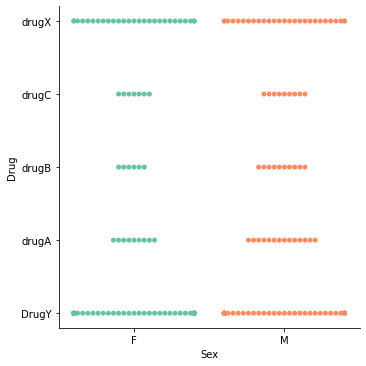

In [22]:
sns.catplot(x = 'Sex' , y = 'Drug' , data = df , kind="swarm" , palette ='Set2')

In [23]:
df['Sex'] = pd.get_dummies(df['Sex'])

In [24]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,DrugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,DrugY


In [25]:
df['Cholesterol'] = pd.get_dummies(df['Cholesterol'])

In [26]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,1,25.355,DrugY
1,47,0,LOW,1,13.093,drugC
2,47,0,LOW,1,10.114,drugC
3,28,1,NORMAL,1,7.798,drugX
4,61,1,LOW,1,18.043,DrugY


In [27]:
BP = df[['BP']]

In [28]:
BP = pd.get_dummies(BP, drop_first = True)

In [29]:
BP.head()

,BP_LOW,BP_NORMAL
0,0,0
1,1,0
2,1,0
3,0,1
4,1,0


In [30]:
df = pd.concat([df , BP] , axis =1)

In [31]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL
0,23,1,HIGH,1,25.355,DrugY,0,0
1,47,0,LOW,1,13.093,drugC,1,0
2,47,0,LOW,1,10.114,drugC,1,0
3,28,1,NORMAL,1,7.798,drugX,0,1
4,61,1,LOW,1,18.043,DrugY,1,0


In [32]:
Drug = df[['Drug']]

In [33]:
Drug = pd.get_dummies(Drug)

In [34]:
Drug.head()

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0


In [35]:
df = pd.concat([df,Drug] , axis =1)

In [36]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,1,HIGH,1,25.355,DrugY,0,0,1,0,0,0,0
1,47,0,LOW,1,13.093,drugC,1,0,0,0,0,1,0
2,47,0,LOW,1,10.114,drugC,1,0,0,0,0,1,0
3,28,1,NORMAL,1,7.798,drugX,0,1,0,0,0,0,1
4,61,1,LOW,1,18.043,DrugY,1,0,1,0,0,0,0


In [37]:
df.drop(["BP", "Drug"], axis = 1, inplace = True)

In [38]:
df.head()

,Age,Sex,Cholesterol,Na_to_K,BP_LOW,BP_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,1,1,25.355,0,0,1,0,0,0,0
1,47,0,1,13.093,1,0,0,0,0,1,0
2,47,0,1,10.114,1,0,0,0,0,1,0
3,28,1,1,7.798,0,1,0,0,0,0,1
4,61,1,1,18.043,1,0,1,0,0,0,0


In [39]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'BP_LOW', 'BP_NORMAL',
       'Drug_DrugY', 'Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX'],
      dtype='object')

In [40]:
X = df.loc[: , ['Age' , 'Sex' , 'Cholesterol' , 'Na_to_K','BP_LOW', 'BP_NORMAL',]]

In [41]:
X.head()

,Age,Sex,Cholesterol,Na_to_K,BP_LOW,BP_NORMAL
0,23,1,1,25.355,0,0
1,47,0,1,13.093,1,0
2,47,0,1,10.114,1,0
3,28,1,1,7.798,0,1
4,61,1,1,18.043,1,0


In [42]:
y = df.loc[: , ['Drug_DrugY', 'Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX']]

In [43]:
y.head()

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0


In [44]:
X.shape

(200, 6)

In [45]:
y.shape

(200, 5)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
random = RandomForestRegressor()

In [50]:
random.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
y_pred = random.predict(X_test)

In [52]:
acc_random = random.score(X_train, y_train)

In [53]:
acc_random

0.9959371443712259

In [54]:
y_test[4:7]

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
128,1,0,0,0,0
115,1,0,0,0,0
69,1,0,0,0,0


In [55]:
X_test[4:7]

,Age,Sex,Cholesterol,Na_to_K,BP_LOW,BP_NORMAL
128,47,0,0,33.542,1,0
115,51,0,1,18.295,0,0
69,18,1,0,24.276,0,0


In [56]:
predict = random.predict(X_test[4:7])

In [57]:
predict

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])